# Tugas Praktikum - Implementasi Support Vector Regression (SVR)

Pada Praktikum latihan 1 dan latihan 2 yaitu implementasi algoritma SVM dan SVR anda telah mendapatkan nilai akurasi dari model. Carilah Parameter pada algoritmat SVM dan SVR sampai anda mendapatkan nilai akurasi terbaik dari kedua algoritma tersebut.

## SVR

In [1]:
import pandas as pd

# Membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
import numpy as np

# Memisahkan atribut dan label 
X = data['YearsExperience'].values
y = data['Salary'].values

# Mengubah bentuk atribut
X = X[:, np.newaxis]

In [5]:
from sklearn.svm import SVR

# Membangun model dengan parameter C, gama, dan kernel
model = SVR(C=1000, gamma=0.5, kernel="rbf")
 
# melatih model dengan fungsi fit
model.fit(X,y)
y_pred_before = model.predict(X)

In [6]:
from sklearn.metrics import r2_score
r2_before = r2_score(y, y_pred_before)
print(f"Akurasi (R²) sebelum tuning: {r2_before:.4f}")

Akurasi (R²) sebelum tuning: 0.2512


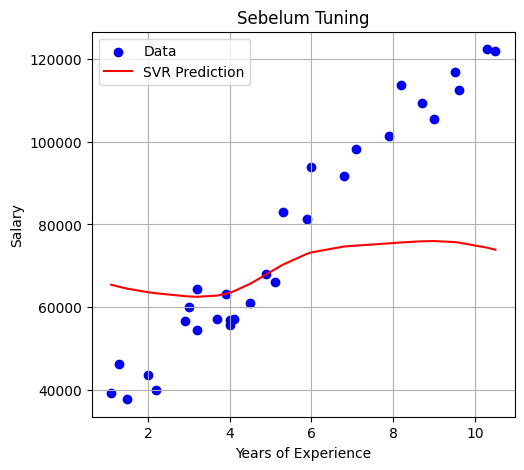

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Sebelum Tuning")
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_before, color='red', label='SVR Prediction')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)

### Tunning

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 0.5, 1, 'scale', 'auto'],
    'kernel': ['linear']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='r2')
grid_search.fit(X, y)

,estimator,SVR()
,param_grid,"{'C': [1, 10, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['linear']}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [9]:
best_model = grid_search.best_estimator_
y_pred_after = best_model.predict(X)
r2_after = r2_score(y, y_pred_after)
print(f"Akurasi (R²) setelah tuning: {r2_after:.4f}")
print(f"Parameter terbaik: {grid_search.best_params_}")

Akurasi (R²) setelah tuning: 0.9568
Parameter terbaik: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}


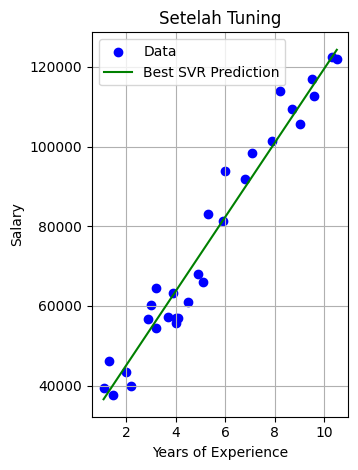

In [10]:
plt.subplot(1, 2, 2)
plt.title("Setelah Tuning")
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_after, color='green', label='Best SVR Prediction')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()